# Keras, overfitting, regularlization

- Part 3.1: Basic Keras
- Part 3.2: Regularization and overfitting

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Exercises

### Part 3.1: Basic Keras

> **Ex. 3.1.1** Let's get started with Keras by examining the implementation of an actual neural network.
I have implemented a very simple `sequential` model to classify handwritten digits from the [mnist](https://keras.io/datasets/#mnist-database-of-handwritten-digits) data set.  Follow the code closely.  Make sure you understand it.  Use Keras documentation e.g. [First contact with Keras](https://keras.io/about/), [Dense Layer](https://keras.io/api/layers/core_layers/dense/), [Getting started with the Keras Sequential model](https://keras.io/getting-started/sequential-model-guide/).

In [ ]:
#download the dataset
(x, y), _ = tensorflow.keras.datasets.mnist.load_data()

# Reshape each image to 1dim vector. Effectively, reshape
# `x_train` from (60000, 28, 28) to (60000, 28*28)
x_train = x[:50000].reshape(-1, 28*28)
x_test = x[50000:].reshape(-1, 28*28)

# Convert y_train from vector of labels to one-hot encoding vector
y = tensorflow.keras.utils.to_categorical(y, num_classes=10)
y_train = y[:50000]
y_test = y[50000:]

>In the following code cell, I construct the model.  Answer the following questions:
>1. How many layers does the network have?
>2. How many neurons in each layer ?
>3. Why is the input dimension 784?
>4. How many weights are there between each layer? (_Hint_: verify with ``model.summary()`` below). Explain how to get these numbers.

1. The network has two layers, the first of 20 neurons and the second of 10 neurons
2. The first has 20 neurons and the second has 10 neurons
3. 784 input dimensions come from each of the 784 pixels of the input, a 28x28 image
4. there are 15,680 weights between the inputs and the first layer, due to each of the 784 pixels having a weight connected to each of the 20 first-layer neurons. Then, there are 200 weights between the first and second layers due to each of the 20 first-layer neurons having a connection with each of the 10 second-layer neurons. These numbers are matched in the model.summary() because the number of parameters is the sum of the number of weights and biases for each layer. 784\*20 weights + 20 biases = 15700 parameters. 20\*10 weights + 10 biases = 210 parameters.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

#
model = Sequential()
model.add(Dense(20, input_dim=784, activation = 'relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])

modelFast = Sequential()
modelFast.add(Dense(128, input_dim=784, activation='relu'))
modelFast.add(Dense(10, activation='softmax'))


modelFast.compile(optimizer=tensorflow.keras.optimizers.SGD(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# let's see what the model "looks" like
model.summary()
modelFast.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 20)                  │          15,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,910 (62.15 KB)

 Trainable params: 15,910 (62.15 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# fit the model to the training data
H = model.fit(x_train, y_train, epochs=15, batch_size=128)
K = modelFast.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1478 - loss: 0.1691
Epoch 2/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3605 - loss: 0.1268
Epoch 3/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4261 - loss: 0.1137
Epoch 4/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4879 - loss: 0.1016
Epoch 5/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5075 - loss: 0.0977
Epoch 6/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5205 - loss: 0.0951
Epoch 7/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5284 - loss: 0.0935
Epoch 8/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5360 - loss: 0.0921
Epoch 9/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5376 - loss: 0.0918
Epoch 10/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5417 - loss: 0.0909
Epoch 11/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5450 - loss: 0.0903
Epoch 12/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

In [ ]:
# evaluate the model on the test dataset
score = model.evaluate(x_test, y_test, batch_size=100)
print("test loss, test acc:", score)
print(score[0])
print(score[1])

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5485 - loss: 0.0897
test loss, test acc: [0.08853042870759964, 0.5543000102043152]
0.08853042870759964
0.5543000102043152


>What kind of scores did you obtain?  What do score[0] and score[1] represent?  

>How could the accuracy be improved?
>1. First try to improve the performance by retraining the model for a longer time (i.e., higher number of epochs).  How much does the accuracy improve?
2. Then try to change the architecture of the network.  For example add more neurons to the exisiting layers; also add another layer of neurons.  Refit the data.  Does the performance increase?
3. **BONUS**. Can you score over 90% accuracy in just five training epochs? (Wait with this exercise, come back to this question when you're done with all the exercises)

>Answer: score takes the network and runs test data on it, getting the accuracy and the loss. Score is a tuple containing the loss and then the accuracy so score[0] is the test loss and score[1] is the test accuracy.

>Answer: Accuracy can be improved by increasing the number of epochs, changing the model architecture, changing the activation functions or loss functions to different computations of accuracy or loss.
   
1. To improve the performance, we increased the number of epochs to 15 and got an accuracy improvement to 73.4% with a test loss of 5.26%. We then tried 50 epochs and got a similar result, the accuracy only improved to 76% and seemed to plateau there, not improving much after hitting 72%.
2. We added 2 more reLU activation layers to make the network 4 layers and it barely improved performance. Then we changed the structure to a 40 -> 30 -> 20 -> 10 and it improved the performance to 80% in 25 epochs which was the best performance we had achieved.
3. Yes you can. You need to increase the number neurons in the first layer and keep the learning rate low. This is because you have alot of neurons and making them all change slighly makes them get to the desiered outcome quicker. Also change loss = categorical crossentropy because its better for images.

In [ ]:
model2 = Sequential()
model2.add(Dense(28*3, input_dim=784, activation = 'relu'))
model2.add(Dense(20*2, activation = 'relu'))
model2.add(Dense(20, activation = 'relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 84)                  │          65,940 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 40)                  │           3,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 20)                  │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 70,370 (274.88 KB)

 Trainable params: 70,370 (274.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
H = model2.fit(x_train, y_train, epochs=15, batch_size=128)

Epoch 1/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1781 - loss: 0.1613
Epoch 2/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3209 - loss: 0.1328
Epoch 3/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4258 - loss: 0.1113
Epoch 4/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5435 - loss: 0.0883
Epoch 5/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5750 - loss: 0.0821
Epoch 6/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5964 - loss: 0.0780
Epoch 7/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6048 - loss: 0.0761
Epoch 8/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6174 - loss: 0.0737
Epoch 9/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6248 - loss: 0.0722
Epoch 10/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6573 - loss: 0.0658
Epoch 11/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7410 - loss: 0.0500
Epoch 12/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [ ]:
score = model2.evaluate(x_test, y_test, batch_size=100)
print("test loss, test acc:", score)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8013 - loss: 0.0382
test loss, test acc: [0.0354691818356514, 0.8162000179290771]


> **Ex. 3.1.2** Solve exercises 1.2.2 and 1.2.3 from week 1 (producing the same result plots), but solve them using Keras.
> Comment on differences in speed and outcome if you observe any.

In [ ]:
def generate_X_linear(N=200):
    X = np.vstack([
        np.random.normal([-2, -2], 1, size=(int(N/2), 2)),
        np.random.normal([2, 2], 1, size=(int(N/2), 2))
    ])

    y = np.array([0] * int(N/2) + [1] * int(N/2)).reshape(-1, 1)

    return X, y

def generate_X_nonlinear(N=200, R=5):
    X_inner = np.random.normal([0, 0], 1, size=(int(N/2), 2))

    X_outer = np.array([
        [R*np.cos(theta), R*np.sin(theta)]
        for theta in np.linspace(0, 2 * np.pi, int(N/2))
    ]) + np.random.randn(int(N/2), 2)

    X = np.vstack([X_inner, X_outer])
    y = np.array([0] * int(N/2) + [1] * int(N/2)).reshape(-1, 1)

    return X, y

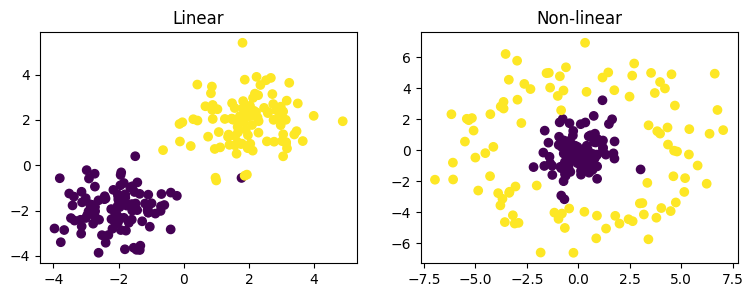

In [ ]:
plt.figure(figsize=(9, 3))

X, y = generate_X_linear()
plt.subplot(1, 2, 1)
plt.title("Linear", fontsize=12)
plt.scatter(X[:, 0], X[:, 1], c=list(y.reshape(-1)))

X, y = generate_X_nonlinear()
plt.subplot(1, 2, 2)
plt.title("Non-linear", fontsize=12)
plt.scatter(X[:, 0], X[:, 1], c=list(y.reshape(-1)))

plt.show()

In [ ]:
X_train, Y_train = generate_X_linear(N = 1e5)
X_test, Y_test = generate_X_linear(N = 1e4)


In [ ]:
# 1.2.2 First network is [2,1]
model3 = Sequential()
model3.add(Dense(2, input_dim =2,  activation = 'relu'))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
H = model3.fit(X_train, Y_train, epochs=5, batch_size=100)

Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5906 - loss: 0.4682
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9938 - loss: 0.0601
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9939 - loss: 0.0333
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9947 - loss: 0.0225
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9954 - loss: 0.0170


In [ ]:
score = model3.evaluate(X_test, Y_test, batch_size=100)
print("test loss: %f, test acc: %f" % (score[0], score[1]))

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.9909 - loss: 0.0109
test loss: 0.015198, test acc: 0.993900


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


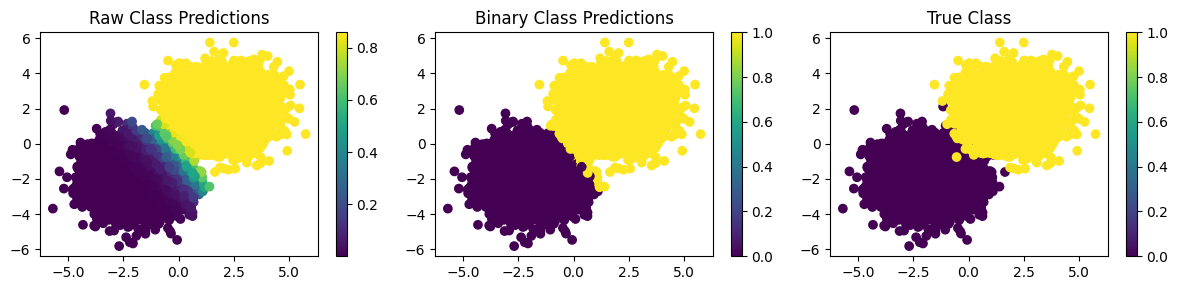

In [ ]:
preds = model3.predict(X_test)

preds_binary = (preds > 0.5).astype(int)

Y_test_flat = Y_test.reshape(-1)

plt.figure(figsize=(12, 3))

plt.subplot(131)
plt.title('Raw Class Predictions')
plt.scatter(X_test[:, 0], X_test[:, 1], c=preds)
plt.colorbar()

plt.subplot(132)
plt.title("Binary Class Predictions")
plt.scatter(X_test[:, 0], X_test[:, 1], c=preds_binary)
plt.colorbar()

plt.subplot(133)
plt.title("True Class")
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test_flat)
plt.colorbar()

plt.tight_layout()
plt.show()


In [ ]:
# Now for non linear with [2,3,1] structure
X_train, Y_train = generate_X_nonlinear(N = 1e5)
X_test, Y_test = generate_X_nonlinear(N = 1e4)

# 1.2.3 Second network is [2,3,1]
non_lin_model = Sequential()
non_lin_model.add(Dense(2, input_dim =2,  activation = 'relu'))
non_lin_model.add(Dense(3, activation = 'relu'))
non_lin_model.add(Dense(1, activation='sigmoid'))

non_lin_model.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])
non_lin_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19 (76.00 B)

 Trainable params: 19 (76.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
H = non_lin_model.fit(X_train, Y_train, epochs=25, batch_size=100)

Epoch 1/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8567 - loss: 0.1118
Epoch 2/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8592 - loss: 0.1103
Epoch 3/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8594 - loss: 0.1108
Epoch 4/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8599 - loss: 0.1100
Epoch 5/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8617 - loss: 0.1091
Epoch 6/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8615 - loss: 0.1089
Epoch 7/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8627 - loss: 0.1088
Epoch 8/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8636 - loss: 0.1081
Epoch 9/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8633 - loss: 0.1082
Epoch 10/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8651 - loss: 0.1070
Epoch 11/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8657 - loss: 0.1065
Epoch 12/25
1000/1000 ━━━━━━━━

In [ ]:
score = non_lin_model.evaluate(X_test, Y_test, batch_size=100)
print("test loss: %f, test acc: %f" % (score[0], score[1]))

100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9305 - loss: 0.0672
test loss: 0.101497, test acc: 0.873800


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


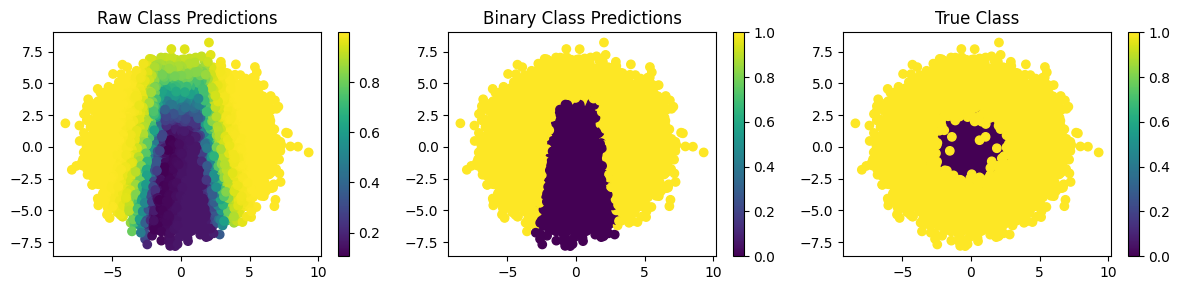

In [ ]:
# Get the raw predictions (continuous probabilities) from the model
preds = non_lin_model.predict(X_test)

# Binarize the predictions by applying a threshold of 0.5
preds_binary = (preds > 0.5).astype(int)

# Convert Y_test to 1D array for consistent plotting
Y_test_flat = Y_test.reshape(-1)

# Plotting
plt.figure(figsize=(12, 3))

# Subplot 1: Raw Class Predictions (continuous)
plt.subplot(131)
plt.title('Raw Class Predictions')
plt.scatter(X_test[:, 0], X_test[:, 1], c=preds)
plt.colorbar()

# Subplot 2: Binary Class Predictions (after thresholding)
plt.subplot(132)
plt.title("Binary Class Predictions")
plt.scatter(X_test[:, 0], X_test[:, 1], c=preds_binary)
plt.colorbar()

# Subplot 3: True Class Labels
plt.subplot(133)
plt.title("True Class")
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test_flat)
plt.colorbar()

# Show the plots
plt.tight_layout()
plt.show()

The first linear network seems to reach a higher accuracy much faster than in assignment 1. The second network, however, seems to learn much slower and often gets stuck. After running with 125 iterations, 5 times the number of iterations as the first assignment and using the better relu activation function, it still does not reach the same accuracy as the models in assignment 1.

### Part 3.2: Overfitting and regularization

A model *overfitting* means that it treats what is essentially noise in the data, as important predictive features, or that it memorizes the outcomes for each training data point rather than general patterns.
Thus an overfitted model will score extremely well on the training data but poorly on new (unseen) data.
In general, the more flexible a model is the easier it will overfit, and for this reason neural networks are notorious overfitters.
Broadly speaking, the way to combat this is to *regularize* the network.

> **Ex. 3.2.1** To understand overfitting, we will intentionally overfit some data! Let's fit a neural network to the following data.  

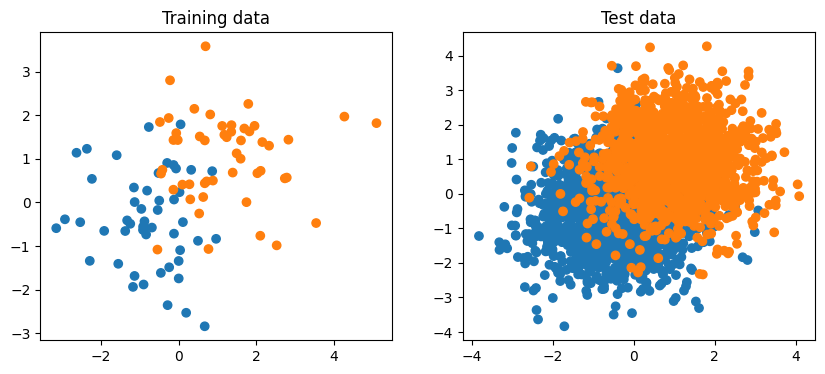

In [ ]:
#code given in week1 exercise 1.2.2, slightly modified to have some crossover points

np.random.seed(2)
def generate_X_linear(N=200):
    X = np.vstack([
        np.random.normal([-0.5, -0.5], 1, size=(int(N/2), 2)),
        np.random.normal([1, 1], 1, size=(int(N/2), 2))
    ])

    y = np.array([0] * int(N/2) + [1] * int(N/2)).reshape(-1, 1)

    return X, y

ntr=100
nts=3e3
x_train, y_train = generate_X_linear(N=ntr)
x_test, y_test = generate_X_linear(N=nts)

fig,ax = plt.subplots(1,2, figsize=[10,4])
ax[0].scatter(x_train[:,0],x_train[:,1],color=['C'+str(i) for i in y_train.ravel()])
ax[1].scatter(x_test[:,0],x_test[:,1],color=['C'+str(i) for i in y_test.ravel()])
ax[0].set_title('Training data'); ax[1].set_title('Test data');

> The *theoretical optimal decision boundary* to separate two gaussian point clouds (no matter how close the centers are) is a *straight line*, and since the clusters are overlapping it is natural that there will be some error when fitting the model to the data. Nevertheless, try to reduce the error to 0 (accuracy = 1) by adding layers of ``overfitter.add(Dense(200, activation = 'relu'))`` to the code below

In [ ]:
import keras
overfitter = Sequential()
overfitter.add(Dense(200, input_dim=2, activation = 'relu'))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dense(200, activation = 'relu'))
overfitter.add(Dense(1, activation='sigmoid'))
overfitter.compile(optimizer='adam',
              loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'])

# fit the model to the training data
history = overfitter.fit(x_train, y_train, epochs=300, batch_size=128, validation_data = (x_test, y_test))

Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6977 - val_accuracy: 0.5530 - val_loss: 0.6515
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.5600 - loss: 0.6451 - val_accuracy: 0.7727 - val_loss: 0.6143
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.7900 - loss: 0.6012 - val_accuracy: 0.8263 - val_loss: 0.5813
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.8800 - loss: 0.5623 - val_accuracy: 0.8343 - val_loss: 0.5517
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.8900 - loss: 0.5274 - val_accuracy: 0.8387 - val_loss: 0.5245
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.8900 - loss: 0.4955 - val_accuracy: 0.8397 - val_loss: 0.4992
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.8900 - loss: 0.4654 - val_accuracy: 0.8427 - val_loss: 0.4763
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.8900 - loss: 0.4377 - val_accuracy: 0.8437 - val_l

> When you get acc=1, plot the test data and colour it using the predictions of your neural network

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


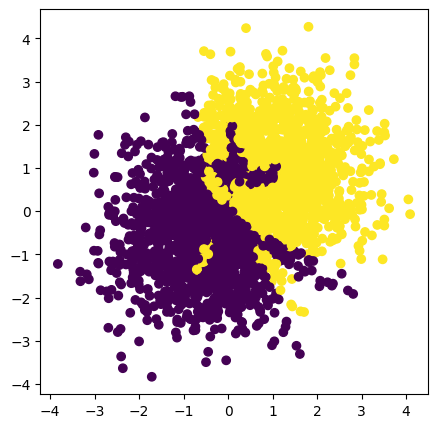

In [ ]:
pred_class = overfitter.predict(x_test) > 0.5 # what does this line do?
fig,ax = plt.subplots(1, 1, figsize=[5,5])
ax.scatter(x_test[:,0], x_test[:,1], c=pred_class)

Answer:
This line generates the neural network output predictions for the test data given as x_test. The output are the probabilities of each datapoint. Then, the network generated output labels are binarized by checking if the value is >0.5

> Now plot the training and test loss as a function of number of epochs

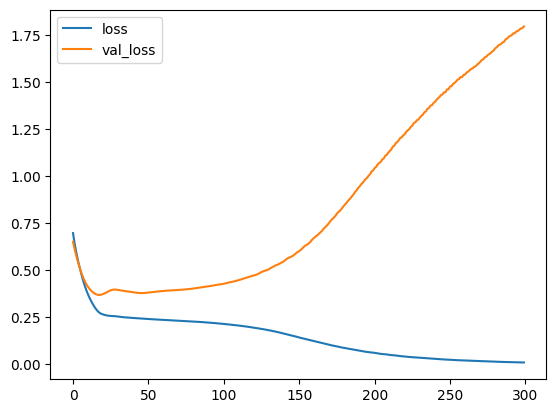

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
score = overfitter.evaluate(X_test, Y_test, batch_size=100)
print("test loss: %f, test acc: %f" % (score[0], score[1]))

100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6190 - loss: 11.0990
test loss: 30.359388, test acc: 0.522300


We can see that our baseline overfitted model scores a 52% accuracy on the test dataset which is very poor and it is clear that the model is very overfitted.

After both lines decrease linar. The training loss decreases linearly slower towards zero, the validation loss initially increases exponentially, then continues in a linear way.

> Finally, use different types of regularization to avoid overfitting:
> - For each technique, provide a working code sample (Remember, all results shall be available when running the notebook as a whole. Make sure this is possible.),
> - For each technique, plot the training and test loss as a function of number of epochs as you did above.
>
> **Ex 3.2.2** Norm regularization:
> 1. Apply L2 regularization to your network so that it cannot overfit. Read about regularization in Keras here: [Layer Weight Regularizers](https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization/). When you add a new layer to your model, one of the parameters is `kernel_regularizer` -- this allows you to select a regularization technique (`l2` in our case), together with a hyperparameter for the regularization.
> 2. What does L2 regularization do? Compare the absolute size of weights in the unregularized and regularized model.
>
> *Hint:* `model.weights` will give you a list of weights and bias arrays for each layer. They are in a Tensorflow format but you can call `.numpy()` on them to get them out as numpy arrays.

In [ ]:
# L2 regularization with lambda = 0.01
from keras.layers import Dense
from keras.regularizers import l2

L2overfitter = Sequential()
L2overfitter.add(Dense(200, input_dim=2, kernel_regularizer=l2(0.01), activation = 'relu'))
L2overfitter.add(Dense(200, kernel_regularizer=l2(0.01), activation = 'relu'))
L2overfitter.add(Dense(200, kernel_regularizer=l2(0.01), activation = 'relu'))
L2overfitter.add(Dense(1, kernel_regularizer=l2(0.01), activation='sigmoid'))
L2overfitter.compile(optimizer='adam',
              loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'])

L2history = L2overfitter.fit(x_train, y_train, epochs=300, batch_size=128, validation_data = (x_test, y_test))

Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 4.7469 - val_accuracy: 0.5287 - val_loss: 4.6326
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.5300 - loss: 4.6244 - val_accuracy: 0.7977 - val_loss: 4.5221
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.8600 - loss: 4.5081 - val_accuracy: 0.8173 - val_loss: 4.4157
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.8800 - loss: 4.3969 - val_accuracy: 0.8253 - val_loss: 4.3124
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.8800 - loss: 4.2891 - val_accuracy: 0.8297 - val_loss: 4.2120
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.8800 - loss: 4.1845 - val_accuracy: 0.8343 - val_loss: 4.1142
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.8800 - loss: 4.0828 - val_accuracy: 0.8357 - val_loss: 4.0188
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.8800 - loss: 3.9838 - val_accuracy: 0.8373 - val_l

In [ ]:
# goes through each layer in a given model, gets all the weights into a single numpy array and calculates the average.
def calculate_average_weight(model):
    all_weights = [layer.get_weights() for layer in model.layers]
    weights_list = []

    for layer_weights in all_weights:
        for weight_matrix in layer_weights:
            weights_list.append(weight_matrix.flatten())

    weights = np.concatenate(weights_list)
    return np.mean(weights)

print("Average of All Weights in Overfitted Model:", calculate_average_weight(overfitter))
print("Average of All Weights in L2-Regularized Model:", calculate_average_weight(L2overfitter))



Average of All Weights in Overfitted Model: 0.0031711748
Average of All Weights in L2-Regularized Model: 0.0015799815


2. L2 Regularization changes the loss function of the layer to include an extra term that accounts for the weights. Specifically, L2 regularization sums the square root of all the weights squared and adds that value, called the regularization term, to the existing loss in the cost function. This means that when the network tries to minimize the cost function, it will tend toward lowering the individual weight values since high weights are viewed as more costly. This in turn trains the model not only to minimize the cost function as it did before but to do it while selecting smaller weight values. This is a regularization technique because when you have large weights, the model is likely finding specific details in the training dataset that are correlated to ouput values but that are nitpicky and not actual learning so when those large weights are applied to a new dataset they cause innaccurate predictions. In essence the network learns the training data too specifically and gets almost 'overconfident,' increasing weights out of proportion which makes it worse in generalizing its predictions to new data.

In our data you can see that the weights of the L2 regularization model are usually around half as large (or even lower) as the overfitted model weights. This means the model is not overfitting as much which you can see below in the graph of test loss and training loss where the testing error does not diverge as greatly from the training error as we saw without the L2 regularization.

Our final test accuracy for this method was 85% which is a solid improvement over the 52% of the previous overfitted model without regularization.

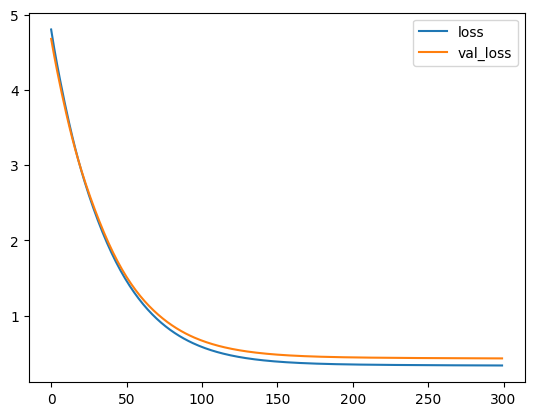

In [ ]:
plt.plot(L2history.history['loss'], label='loss')
plt.plot(L2history.history['val_loss'], label='val_loss')
plt.legend()

> **Ex 3.2.3** Early stopping: Often we like to monitor the model's performance on a test set also while we train the model.
This allows us to do something called "early stopping" which is a way of regularizing by stopping the training process before the network overfits (we know it overfits when the performance on the training set starts getting much better than on the test set).
Implement early stopping when training on the random data above. What accuracy do you get?
>
> *Hint*: There's an example [here](https://keras.io/getting-started/faq/#how-can-i-interrupt-training-when-the-validation-loss-isnt-decreasing-anymore) and a more complete explanation [here](https://keras.io/api/callbacks/early_stopping/).

> *Ans 3.2.3:* We used early stopping with monitor = 'val_loss', patience = 5 and mode = 'min'. Meaning if the validation loss does not improve for 5 consecutive epochs then the model will stop training. In this usage, the training stopped at epoch 13 with a validation accuracy of 84% and training accuracy of 88%. It also looks like the  

In [ ]:
# Importing earlystopping module and setting parameters
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', mode = 'min', patience=5, verbose = 1)


In [ ]:
# Creating, fitting and evaluating the early stopping model
EarlyStopper = Sequential()
EarlyStopper.add(Dense(200, input_dim=2, activation = 'relu'))
EarlyStopper.add(Dense(200, activation = 'relu'))
EarlyStopper.add(Dense(200, activation = 'relu'))
EarlyStopper.add(Dense(1, activation='sigmoid'))
EarlyStopper.compile(optimizer='adam',
              loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'])

EarlyStopper = EarlyStopper.fit(x_train, y_train, epochs=300, batch_size=64, validation_data = (x_test, y_test), callbacks=[early_stopping], verbose=1)

Epoch 1/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 417ms/step - accuracy: 0.5163 - loss: 0.7000 - val_accuracy: 0.8457 - val_loss: 0.6252
Epoch 2/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.8731 - loss: 0.6029 - val_accuracy: 0.8493 - val_loss: 0.5641
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.8798 - loss: 0.5347 - val_accuracy: 0.8480 - val_loss: 0.5102
Epoch 4/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.8731 - loss: 0.4745 - val_accuracy: 0.8510 - val_loss: 0.4605
Epoch 5/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.8783 - loss: 0.4143 - val_accuracy: 0.8517 - val_loss: 0.4168
Epoch 6/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.8598 - loss: 0.3602 - val_accuracy: 0.8510 - val_loss: 0.3822
Epoch 7/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.8598 - loss: 0.3177 - val_accuracy: 0.8497 - val_loss: 0.3594
Epoch 8/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.8598 - loss: 0.2896 - val_accuracy: 0.8500 - val

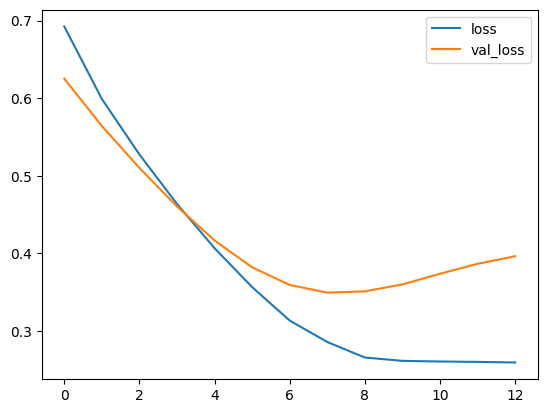

In [ ]:
plt.plot(EarlyStopper.history['loss'], label='loss')
plt.plot(EarlyStopper.history['val_loss'], label='val_loss')
plt.legend()

Here we can see that after epoch 7 the valildation loss only increased, causing the early stopping to happen at the end of epoch 12, 5 epochs later. Again, we see a large improvement in test accuracy with a final test accuracy of 84.6%. This seems to be a better method than L2 for this problem as it reached a similar accuracy with far fewer epochs.

> **Ex 3.2.4** Dropout: Another clever way to regularize a network, is to randomly "drop out" some fraction of neurons during each training batch, so the network cannot store memory in specific neurons. The method is called Dropout. Go ahead and take your overfitting model and apply dropout in one or more of the layers and comment on the performance.
>
> *Hint*: Check out the reference [here](https://keras.io/api/layers/regularization_layers/dropout/).

>*Ans 3.2.4*: We added 3 dropout layers with rates 0.5, 0.4, and 0.3 consecutively to the overfitting model. The training accuracy was 89% and validation accuracy was 84% after 300 epoch. The overfitting on the training data have reduced quite a bit even after 300 epoch.  

In [ ]:
# importing dropout module
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Creating, fitting and evaluating the dropout model
Dropout_model = Sequential()
Dropout_model.add(Dense(200, input_dim=2, activation='relu'))
Dropout_model.add(Dropout(0.5, seed = 1234))  # Dropout layer with 50% rate
Dropout_model.add(Dense(200, activation='relu'))
Dropout_model.add(Dropout(0.4, seed = 123))  # Dropout layer with 50% rate
Dropout_model.add(Dense(200, activation='relu'))
Dropout_model.add(Dropout(0.3, seed = 12))  # Dropout layer with 50% rate
Dropout_model.add(Dense(1, activation='sigmoid'))

Dropout_model.summary()

Dropout_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
Dropout_model = Dropout_model.fit(x_train, y_train, epochs=300, batch_size=64, validation_data = (x_test, y_test), verbose=1)

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_88 (Dense)                     │ (None, 200)                 │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_90 (Dense)                     │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_91 (Dense)                     │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,201 (317.19 KB)

 Trainable params: 81,201 (317.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 332ms/step - accuracy: 0.5000 - loss: 0.6959 - val_accuracy: 0.8333 - val_loss: 0.6297
Epoch 2/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.7767 - loss: 0.6395 - val_accuracy: 0.8443 - val_loss: 0.5789
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.8242 - loss: 0.5911 - val_accuracy: 0.8450 - val_loss: 0.5305
Epoch 4/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.8783 - loss: 0.5064 - val_accuracy: 0.8460 - val_loss: 0.4842
Epoch 5/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.9058 - loss: 0.4706 - val_accuracy: 0.8470 - val_loss: 0.4409
Epoch 6/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.8821 - loss: 0.4142 - val_accuracy: 0.8483 - val_loss: 0.4038
Epoch 7/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.9006 - loss: 0.3513 - val_accuracy: 0.8490 - val_loss: 0.3759
Epoch 8/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.8665 - loss: 0.3303 - val_accuracy: 0.8510 - va

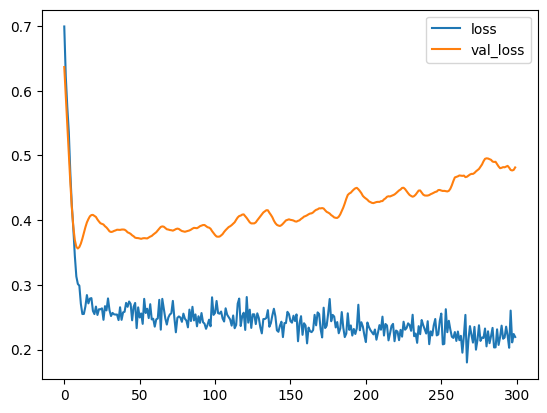

In [ ]:
plt.plot(Dropout_model.history['loss'], label='loss')
plt.plot(Dropout_model.history['val_loss'], label='val_loss')
plt.legend()

Again, similarly we see a large improvement in validation accuracy up to 84.4% with the dropout model. It is a solid performance improvement but does not compare to the early stopping. However, it seems as though 300 iterations is clearly far too many and if we performed this method with fewer iterations or combined with early stopping we may see a slight performance improvement.

> **Ex 3.2.5** More data: The most important thing when training a machine learning model is getting enough data. Oftentimes, having enough data is all the regularization you need: The training phase is updating the weights to makes the cost function smaller, but the cost function now tries to make the network good at predicting on many different data-points. This leads to the network having to come up with more generalizable prediction rules (and generalization is opposite of overfitting).
>
> Change `ntr` from `100` to `1000` in the code that generates the data and run the `overfitter` model that you got to overfit on the smaller dataset of 100 datapoints; what happens?

>Ans 3.2.5: We changed the training dataset to include 1000 datapoints and ended up getting training accuracy to be 87% and validation accuracy to be around 83%. This shows that the overfitting on the training data has reduced significantly due to larger training dataset even after 300 epoch.

In [ ]:
# changing the number of training data points to 1000
ntr=1000
x_train1000, y_train1000 = generate_X_linear(N=ntr)

In [ ]:
import keras
MoreData_model = Sequential()
MoreData_model.add(Dense(200, input_dim=2, activation = 'relu'))
MoreData_model.add(Dense(200, activation = 'relu'))
MoreData_model.add(Dense(200, activation = 'relu'))
MoreData_model.add(Dense(1, activation='sigmoid'))
MoreData_model.compile(optimizer='adam',
              loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'])

# fit the model to the training data
MoreData_model = MoreData_model.fit(x_train1000, y_train1000, epochs=300, batch_size=128, validation_data = (x_test, y_test))

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7185 - loss: 0.6065 - val_accuracy: 0.8527 - val_loss: 0.4113
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8255 - loss: 0.3983 - val_accuracy: 0.8573 - val_loss: 0.3417
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8512 - loss: 0.3505 - val_accuracy: 0.8523 - val_loss: 0.3598
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8382 - loss: 0.3628 - val_accuracy: 0.8563 - val_loss: 0.3480
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8442 - loss: 0.3528 - val_accuracy: 0.8600 - val_loss: 0.3402
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8483 - loss: 0.3425 - val_accuracy: 0.8587 - val_loss: 0.3441
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8465 - loss: 0.3485 - val_accuracy: 0.8603 - val_loss: 0.3408
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8551 - loss: 0.3342 - val_accuracy: 0.8553 - val_loss:

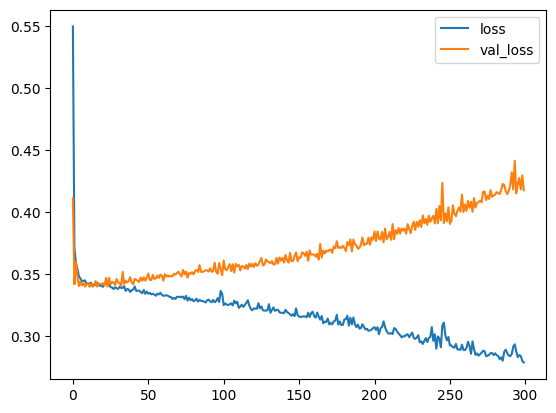

In [ ]:
plt.plot(MoreData_model.history['loss'], label='loss')
plt.plot(MoreData_model.history['val_loss'], label='val_loss')
plt.legend()

> **Ex 3.2.6** Comparison: Compare the different types of regularization and express your ideas on how you would use them for a project.



*   L2 regularization: accuracy: 0.8900; loss: 0.3357; val_accuracy: 0.8503; val_loss: 0.4297.
*   Early Stopping: accuracy: 0.8888; loss: 0.2559; val_accuracy: 0.8460; val_loss: 0.3965.
*   Dropout Layers: accuracy: 0.8902; loss: 0.2593; val_accuracy: 0.8447: val_loss: 0.5292.
*   Larger training dataset: accuracy: 0.8717; loss: 0.2789: val_accuracy: 0.8360: val_loss: 0.4176.

We can see that the validation accuracy for all of the regularization method are almost the same around 84%. The training accuracies are also pretty close around 88%. From a performance point of view they are quite same. But They differe in terms of traing time and size of training data.

>L2 regularization is fit for a project where the model is not super large and available training dataset is not quite large. Then we can train the model many times to pick up the patterns of the dataset and at the same time not overfit it by penalizing large weights.

>Early stopping is fit for a project where the model is quite large so that it takes a lot of time to train the model. So by stopping the training process when the model is not really improving in the validation dataset will save us a lot of time and make the training feasible.

>Dropout layer method is fit for smaller model that takes less time to train with limited traiing dataset to learn from. By training for large number of epoch we can learn the pattern but at the same time the drop out layers stops the model from relying heavily on any specific neuron. In turn stopping over fitting.

>In a project where enough training dataset is available it is always good to use most amount of training data possible so that the model learns actual pattern in the dataset as opposed to overfitting. It is also important that the model is not too large so it doesn't take unfeasible amount of time while training.

